# 三层全连接网络的Pytorch实现

https://pytorch.org/

In [32]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
%matplotlib inline

In [33]:
torch.__version__

'1.13.0'

## 导入数据 
ETL: **extract-transform-load**

In [34]:
# 定义全局变量
n_epochs = 10     # epoch 的数目
batch_size = 20   # 决定每次读取多少图片

# 定义训练集个测试集，如果找不到数据，就下载
train_data = datasets.MNIST(root = './data/MNIST', train = True, download = True, transform = transforms.ToTensor())
test_data = datasets.MNIST(root = './data/MNIST', train = True, download = True, transform = transforms.ToTensor())

# 创建加载器
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, num_workers = 0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = len(test_data), num_workers = 0)

In [35]:
len(train_data),len(train_loader)

(60000, 3000)

In [36]:
for x,y in train_loader:
    print(x.shape,y.shape)
    break

torch.Size([20, 1, 28, 28]) torch.Size([20])


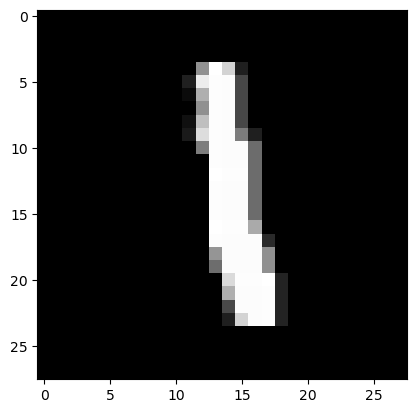

In [37]:
plt.imshow(x[6,0],cmap='gray')

## 定义模型、损失函数（准则）和优化器

In [50]:
# model
model = nn.Sequential(nn.Linear(784,512),nn.ReLU(),nn.Linear(512,512),nn.ReLU(),nn.Linear(512,10))

# loss
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [39]:
model

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=10, bias=True)
)

In [40]:
# 网络结构可视化软件：  https://github.com/lutzroeder/netron 
torch.onnx.export(model,torch.randn(2,784),'/Users/zqp/Desktop/mlp.onnx',input_names=['input'],output_names=['output'])

![image-20221208101739730](https://tva1.sinaimg.cn/large/008vxvgGly1h8w6pql09uj30bi0yogmh.jpg)

## 模型训练

In [16]:
# train
losses = []
for batch_idx, (X_batch, y_batch) in tqdm(enumerate(train_loader)):
    X_batch = X_batch.flatten(start_dim=1)
    # Zero gradient buffers
    optimizer.zero_grad()

    # Pass data through the network
    y_hat = model(X_batch)

    # Calculate loss
    loss = criterion(y_hat, y_batch)

    # Backpropagate
    loss.backward()

    # Update weights
    optimizer.step()

    if batch_idx%20==0:
        losses.append(loss.data.item())

3000it [00:13, 215.59it/s]


## 结果分析

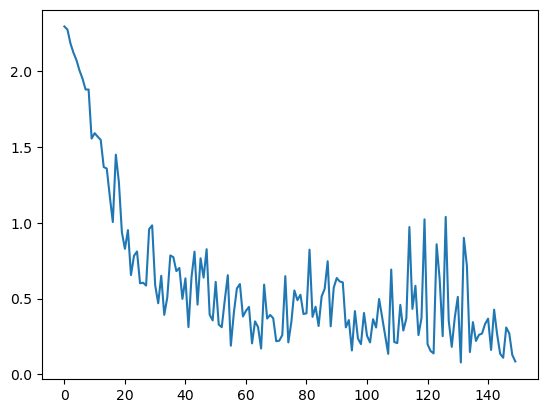

In [47]:
plt.plot(losses);
plt.show()

In [41]:
idx_test = 388
image_test = test_data.test_data[idx_test]
image_test_flatten = torch.tensor(image_test.reshape(1,-1),dtype=torch.float)
label_test = test_data.test_labels[idx_test]

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
y_predict = model(image_test_flatten)
label_predict = torch.argmax(y_predict).item()
print(y_predict)

tensor([[-1.9716,  6.7337, -5.5933,  1.0728,  8.4555,  4.1323,  7.3507, -2.9119,
         -6.4765,  0.3193]], grad_fn=<AddmmBackward0>)


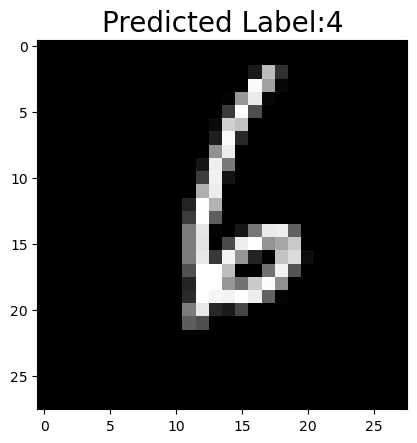

In [45]:
plt.imshow(image_test,cmap='gray')
plt.title(f'Predicted Label:{label_predict}',fontsize=20)
plt.show()

In [48]:
for data, target in test_loader:
    data = data.flatten(start_dim=1)
    output = model(data)
    pred = torch.argmax(output,dim=1)
    correct = pred.eq(target)
    accuracy = np.mean([1 if c else 0 for c in correct])
print(f'Accuracy:{accuracy*100:.2f}%')

Accuracy:6.95%
